# MACHINE LEARNING - FINAL PROJECT - Ufficiale
## KICKSTARTER
### GROUP 6: 
- Maria Baglieri Occhipinti (49638)
- Moritz Constantin Güttersberger (48845)
- Moritz Lilleholt Häckel (49558)
- Eugenia Saggioro (50958)
- Dominik Trut (46274)


### SUMMARY
**TO BE ADJUSTED**

[1. From BP to ML](#From-Business-Problem-to-Machine-Learning-Problem)

[2. Data Understanding](#Loading-data) **CHANGE CONNECTION/RENAME**

[3. Data Preparation](#Exploratory-Data-Analysis)

[4. Modeling](#Modeling)

[5. Evaluation](#Evaluation)

[6. Conclusions](#Conclusions)

## From Business Problem to Machine Learning Problem

#### BUSINESS OVERVIEW
Kickstarter is a crowdfunding platform that allows people to support creative projects. Film, gaming, and music, as well as art, design, and technology projects, are all covered.

The dataset at hand was crawled from the platform and contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). 

Every project creator establishes a financing target (funding goal) and a deadline for their project. People can donate money to help make the concept a reality if they like it. Funding on Kickstarter is *“all-or-nothing”*. If the project meets its funding goal, all backers' credit cards will be charged after the deadline passes and Kickstarter deducts a 5% fee from pledged amount. On the other hand, if the projects fall short of its funding goal, no one is charged. 

Project creators retain complete ownership of their work. After a project is deemed successful, Kickstarter cannot be used to seek loans or to give financial returns or equity. Backers can support projects to help them come to life, not to profit monetarily. 

As stated from the platform’s website, while 10% of projects finished having never received a single pledge, 78% of projects that raised more than 20% of their goal were successfully funded. Therefore Kickstarter has a great potential to bring ideas to fruition

#### PROJECT’S GOAL

During the course of this project, we will take the perspective of project creators to assist them in optimizing their proposal. 

For a project’s success or failure on crowdfunding platforms, it’s important to consider the influence of all the factors characterizing that project. Some of these factors can be measured or classified, allowing for the development of a model to forecast whether a project will succeed or fail. 

Some projects are more successful than others and our intuition is that this does not always depend on the key idea. Some projects might fail because they don’t hit the target (backers) due to wrong descriptions, uncommon topic, too high funding goal or simply the project doesn’t seem trustworthy

The goal of this project is to analyze Kickstarter projects’ data and build a useful model for project creators to understand which features attract backers the most or which projects are most likely to collect a higher amount. We will try to find the main patterns and the odds of a project’s success. Thanks to this model, decision makers (project creators) will gain useful insights before publishing their project on the platform.

#### PROBLEM DEFINITION

In order to achieve the goal explained above, we will use a dataset crawled from Kickstarter, which contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). The dataset contains all the projects hosted between **MISSING** and **MISSING**.

Given the **big amount** of original data available (205696 projects with more than 37 variables), and the reasons explained below, it is reasonable to involve automation to solve this problem. 
- There is no existing formula to answer the main question.The features of each project set on the platform contribute in different ways to its success and this cannot be translated into simple rules.
- Analyzing the probability of success and which are the main drivers of the end result, project by project, would **not** be **feasible**. 
- Some columns like the description of the project (blurb) contain **unstructured text** which needs to be analyzed. Nevertheless, there are few features with unstructured text. 

All in all, there is a big potential for data to be **represented in a meaningful way**, with both numbers and categorical values (e.g. state, status, location). 

#### STRUCTURE OF THE DATA

The amount of data available is enough to build a machine learning model. We have information regarding:
- The type of the project (category, subcategory, brief description, its profile)
- The creator
- The start date, the duration of the crowdfunding, and the date when the status of the project was changed 
- The funding goal, the pledged amount, the original currency, the exchange rate and the converted pledged amount. 
- The number of backers achieved. 
For more information regarding the variables available, please see the **DATA CLEANING** section.

The **quality** and the **quantity** of data are fundamental to building an efficient model. The data available is complete and consistent across the datasets. There are some variables with almost all empty cells (friends, is_starred, etc.) and some others with an invalid format (category, creator, location, etc.) that must be modified. 

Around 55% of the projects available are successful, ~ 36% are labeled as failed and the rest is live/canceled/suspended. This means we have little information regarding the canceled projects. Nevertheless, we have a big and balanced amount of successful and failed projects. 

12% of the projects are current ones, while around 88% are past projects. This difference is valuable since we will work on past projects to build an efficient model and apply it to current projects. 

Projects are split into 15 categories and 159 subcategories. As we can see on the right, Music, Film & Video and Technology are the categories with more projects while Dance is the category with only 3 subcategories and 3156 projects (less than 2% of the entire dataset).

All in all, we can state the quality of data is good enough to work on it and create a model. 

Data available presents **regular patterns** between the independent variables (inputs) and the final result (success/failure, pledged amount)
These patterns are necessary for the model to learn from them and to extract a valid output.

**WE MISS A PART DESCRIBING IF WE DROP SOME VARIABLES AND WHY, IF WE WILL USE NLP AND WHY, AND PARTS LIKE Some features were initially retained for exploratory data analysis (EDA) purposes, but were then dropped in order to use machine learning models. These included features that are related to outcomes (e.g. the amount pledged and the number of backers) rather than related to the properties of the project itself (e.g. category, goal, length of campaign). IN THE EDA**

 
#### EVALUATION OF THE MODEL – criteria
**TO BE REVIEWED**
1. Proportion of the projects where the model accurately predicted the final success or failure of the project. 
2. The difference between the level of the pledged amount predicted by the model against the amount achieved 
3. The number of backers predicted for the specific type of project from the model versus the actual amount of backers


## Loading data

Import the dataset:

In [2]:
import pandas as pd
import numpy as np
import os
import datetime


Merge all the csv files to have all the data together.

In [2]:
files = [file for file in os.listdir('Kickstarter_Dataset')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Kickstarter_Dataset/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv("Kickstarter_Complete.csv", index = False)

Import the complete dataset.

In [42]:
df = pd.read_csv("Kickstarter_Complete.csv")

df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,210,Believing Heart Tarot is a one of a kind addit...,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",14166,US,1513372142,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,$,True,...,believing-heart-tarot-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1522555142,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,international
1,3,Be a part of Street Art Magic and have a hand ...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",42,US,1390444485,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,$,True,...,zone-7-street-arts-initiative,https://www.kickstarter.com/discover/categorie...,False,False,failed,1392323039,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,international
2,31,My writing changed after my daughter was kille...,"{""id"":359,""name"":""Print"",""slug"":""journalism/pr...",1127,US,1404688773,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,$,True,...,loving-becca-journey-of-child-loss,https://www.kickstarter.com/discover/categorie...,True,False,successful,1407702831,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,international
3,4,The Sweet Botanist's natural syrups are made s...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",105,US,1464156479,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,$,True,...,the-sweet-botanist-syrup-co,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466802580,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,international
4,800,The digital restoration of the classic 1968 Ro...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",28720,US,1331149074,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,$,True,...,el-capitan-film-restoration,https://www.kickstarter.com/discover/categorie...,True,False,successful,1351739753,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,international


In [43]:
df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205696 entries, 0 to 205695
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             205696 non-null  int64  
 1   blurb                     205686 non-null  object 
 2   category                  205696 non-null  object 
 3   converted_pledged_amount  205696 non-null  int64  
 4   country                   205696 non-null  object 
 5   created_at                205696 non-null  int64  
 6   creator                   205696 non-null  object 
 7   currency                  205696 non-null  object 
 8   currency_symbol           205696 non-null  object 
 9   currency_trailing_code    205696 non-null  bool   
 10  current_currency          205696 non-null  object 
 11  deadline                  205696 non-null  int64  
 12  disable_communication     205696 non-null  bool   
 13  friends                   276 non-null     o

## Data Cleaning

#### Columns to delete.

We decided to preliminary delete the following columns as they are not useful for our analysis: 
- currency_symbol: the symbol of the original currency the project goal was denominated in.
- currency_trailing_code: the code of the original currency the project goal was denominated in.
- id: id number of the project.
- photo: contains a link and information to the project's image.
- permissions: just 276 values. 
- friends: just 274 values.
- source_url: url for the project's category.
- is_backing: just 276 values.
- is_starred: just 276 values.
- usd_type: international or domestic.

In [45]:
del df['currency_symbol']
del df['currency_trailing_code']
del df['id']
del df['photo']
del df['permissions']
del df['friends']
del df['source_url']
del df['is_backing']
del df['is_starred']
del df['usd_type']

#### Rename backers_count into nr_backers.
backers_count shows the number of backers for that project.

In [46]:
df=df.rename(columns={"backers_count":"nr_backers"})

#### Create 3 new columns from the category column: category, subcategory and category_id.

In [47]:
df=df.rename(columns={"category":"Category"})

In [48]:
df['category'] = df['Category'].apply(lambda x: x.split('"slug":"')[1].split('/')[0])
df['category'] = df['category'].apply(lambda x: x.split('"')[0])
df['subcategory'] = df['Category'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['subcategory_id'] = df['Category'].apply(lambda x: x.split('"id":')[1].split(',')[0])

In [49]:
del df['Category']

#### Modify the date time columns.

In [50]:
df['created_at'] = pd.to_datetime(df['created_at'], unit="s").dt.date
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit="s").dt.date
df['deadline'] = pd.to_datetime(df['deadline'], unit="s").dt.date
df['launched_at'] = pd.to_datetime(df['launched_at'], unit="s").dt.date

In [51]:
df.head()

,nr_backers,blurb,converted_pledged_amount,country,created_at,creator,currency,current_currency,deadline,disable_communication,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,category,subcategory,subcategory_id
0,210,Believing Heart Tarot is a one of a kind addit...,14166,US,2017-12-15,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,USD,2018-04-01,False,...,True,False,successful,2018-04-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,art,Digital Art,21
1,3,Be a part of Street Art Magic and have a hand ...,42,US,2014-01-23,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,USD,2014-02-13,False,...,False,False,failed,2014-02-13,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,art,Public Art,53
2,31,My writing changed after my daughter was kille...,1127,US,2014-07-06,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,USD,2014-08-10,False,...,True,False,successful,2014-08-10,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,journalism,Print,359
3,4,The Sweet Botanist's natural syrups are made s...,105,US,2016-05-25,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,USD,2016-06-24,False,...,False,False,failed,2016-06-24,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,food,Drinks,307
4,800,The digital restoration of the classic 1968 Ro...,28720,US,2012-03-07,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,USD,2012-11-01,False,...,True,False,successful,2012-11-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,film & video,Documentary,30


#### Create 4 new columns from the creator one: creator_id, creator_name, is_registered.

In [53]:
df['creator_id'] = df['creator'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['creator_name'] = df['creator'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['is_creator_registered'] = df['creator'].apply(lambda x: x.split('"is_registered":')[1].split(',')[0])

In [54]:
del df['creator']

#### Create 2 new columns from the location one: city and state.

In [55]:
df['nation'] = df['location'].astype(str).apply(lambda x: x.split('"state":"')[1].split('"')[0] if len(x.split('"state":"'))>1 else x.split('-')[0])
df['city'] = df['location'].astype(str).apply(lambda x: x.split('"name":"')[1].split('"')[0] if len(x.split('"name":"'))>1 else x.split('-')[0])

In [56]:
del df['location']

#### Create 2 columns from the profile one: project_id and project_status.

In [57]:
df['project_id'] = df['profile'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['project_status'] = df['profile'].apply(lambda x: x.split('"state":"')[1].split('"')[0])

In [58]:
del df['profile']

#### Modify the urls column.

In [59]:
df['url'] = df['urls'].apply(lambda x: x.split('"project":"')[1].split('"')[0])

In [60]:
del df['urls']

#### Converting the goal in USD.

In [61]:
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

Given that we have a new column with the goal of all projects in USD we can drop these two columns:

In [62]:
del df['goal']
del df['static_usd_rate']

#### Dropping duplicates.

Check the number of projects that are listed more than one and drop them.

In [63]:
print(f"The number of duplicates is {len(df[df.duplicated(subset='project_id')])} over {len(df)} projects.")

The number of duplicates is 18622 over 205696 projects.


In [64]:
df.drop_duplicates(inplace=True)

#### Feature Engineering.

Creating new columns that can be useful for our analysis. 

In [66]:
#Name: Word length
df['name_len'] = df['name'].str.split().str.len()
df.name_len.fillna(0, inplace=True)

#Blurb: Word length
df['blurb_len'] = df['blurb'].str.split().str.len()
df.blurb_len.fillna(0, inplace=True)

#Average pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['nr_backers'],2)

In [67]:
#Time between creating and launching the project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days

In [68]:
#Length of the campaign
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days 

In [69]:
# Launch and deadline day of week
df['launched_at'] = pd.to_datetime(df.launched_at, format='%Y-%m-%d')
df['launch_day'] = df['launched_at'].dt.day_name()
df['deadline'] = pd.to_datetime(df.deadline, format='%Y-%m-%d')
df['deadline_day'] = df['deadline'].dt.day_name()

# Launch and deadline month
df['launch_month'] = df['launched_at'].dt.month_name()
df['deadline_month'] = df['deadline'].dt.month_name()

In [70]:
df.head()

,nr_backers,blurb,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,...,usd_goal,name_len,blurb_len,pledge_per_backer,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month
0,210,Believing Heart Tarot is a one of a kind addit...,14166,US,2017-12-15,USD,USD,2018-04-01,False,1.0,...,4000.0,4.0,25.0,67.46,76,31,Thursday,Sunday,March,April
1,3,Be a part of Street Art Magic and have a hand ...,42,US,2014-01-23,USD,USD,2014-02-13,False,1.0,...,777.0,5.0,23.0,14.00,7,14,Thursday,Thursday,January,February
2,31,My writing changed after my daughter was kille...,1127,US,2014-07-06,USD,USD,2014-08-10,False,1.0,...,1000.0,7.0,26.0,36.35,5,30,Friday,Sunday,July,August
3,4,The Sweet Botanist's natural syrups are made s...,105,US,2016-05-25,USD,USD,2016-06-24,False,1.0,...,1000.0,8.0,19.0,26.25,0,30,Wednesday,Friday,May,June
4,800,The digital restoration of the classic 1968 Ro...,28720,US,2012-03-07,USD,USD,2012-11-01,False,1.0,...,25000.0,4.0,12.0,35.90,209,30,Tuesday,Thursday,October,November


In [71]:
df.dtypes

nr_backers                           int64
blurb                               object
converted_pledged_amount             int64
country                             object
created_at                          object
currency                            object
current_currency                    object
deadline                    datetime64[ns]
disable_communication                 bool
fx_rate                            float64
is_starrable                          bool
launched_at                 datetime64[ns]
name                                object
pledged                            float64
slug                                object
spotlight                             bool
staff_pick                            bool
state                               object
state_changed_at                    object
usd_pledged                        float64
category                            object
subcategory                         object
subcategory_id                      object
creator_id 

#### Ordering the columns.

In [72]:
df = df[['project_id', 'state', 'name','name_len', 'slug', 'blurb','blurb_len', 'url', 'category', 'subcategory','subcategory_id', 
         'creator_id', 'creator_name', 'is_creator_registered', 'country', 'nation', 'city', 'created_at', 
         'launched_at','launch_day','launch_month','creation_to_launch_days','deadline','deadline_day','deadline_month','campaign_days', 
         'nr_backers','pledge_per_backer', 'usd_goal', 'pledged', 'currency', 'usd_pledged', 'current_currency', 
         'fx_rate', 'project_status', 'state_changed_at', 'disable_communication', 'is_starrable', 'spotlight', 'staff_pick' ]]

#### Saving the new dataset.

In [73]:
df.to_csv("Cleaned_Kickstarter.csv", index = False)

#### Description of our final variables.

- project_id: id of the project.
- state: status of the project (successful, failed, canceled, live, suspended)
- name: name of the project.
- name_len: length of the name. 
- slug: nickname of the project.
- blurb: description of what’s the project about.
- blurb_len: length of the blurb.
- url: url of the project.
- category: category of the project.
- subcategory: subcategory of the project.
- subcategory_id: id of the subcategory of the project.
- creator_id: id of the creator of the project.
- creator_name: name of the creator of the project.
- is_creator_registered: 
- country: country where the project has originated.
- nation: nation where the project has originated.
- city: city where the project has originated.
- created_at: when the project has been created - yyyy/mm/dd.
- launched_at: launch date of the project - yyyy/mm/dd.
- launch_day: day of the week in which the project has been launched. 
- launch_month: month in which the project has been launched.
- creation_to_launch_days: number of days between the creation and the launch of the project.
- deadline: deadline of the project - yyyy/mm/dd.
- deadline_day: day of the week in which the project has been closed. 
- deadline_month: month in which the project has been closed.
- campaign_days: number of days between the launch and the deadline. 
- nr_backers: number of backers for the project.
- pledge_per_backer: total amount of money pledged divided by the number of backers. 
- usd_goal: amount of money for reaching the goal in usd.
- pledged: pledged amount in the initial currency.
- currency: currency of the project.
- usd_pledged: pledged amount multiplied for the static usd rate.             
- current_currency: current currency of the project.
- fx_rate: exchange rate.                                 
- project_status.          
- state_changed_at: when the state of the project changed - yyyy/mm/dd.         
- disable_communication: status about communication, id false for all campaigns that have ended.   
- is_starrable: how successful Kickstarter believes the campaign will be.           
- spotlight: after your project is successfully funded you will gain access to the Spotlight page tool which allows you to make a home for your project.   
- staff_pick: feature that highlights promising projects on the site to give them a boost by helping them get exposure through email newsletter and highlighted spots around the site.

The timeframe in which this projects have been created is:

In [75]:
print(f"Between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

Between 21 April 2009 and 18 October 2018.


##  Exploratory Data Analysis

### Main Statistics

How many successful/failed/canceled projects?

In [76]:
df['state'].value_counts(normalize=True) * 100

successful    53.284702
failed        39.392096
canceled       4.513259
live           2.483562
suspended      0.326381
Name: state, dtype: float64

Statistics regarding categories and subcategories available

In [77]:
nr_category = df['category'].nunique()
nr_subcategory = df['subcategory'].nunique()
active_projects = df['project_status'].value_counts()

print(f'There are {nr_category} categories')
print(f'There are {nr_subcategory} subcategories')
print(f'There are {active_projects[1]} current projects and {active_projects[0]} past ones')

There are 15 categories
There are 159 subcategories
There are 22411 current projects and 166632 past ones


In [78]:
df_category = pd.DataFrame({ 'Nr of subcategories': df.groupby('category')['subcategory'].nunique(),
                            'Projects per category': df.groupby('category')['project_id'].nunique()
                           }).sort_values('Projects per category', ascending = False)
df_category["Frequency"] = df_category['Projects per category']/df_category['Projects per category'].sum()*100

df_category

,Nr of subcategories,Projects per category,Frequency
category,,,
music,19,25359,13.555598
film & video,20,25274,13.510162
technology,16,19087,10.202914
art,13,18621,9.953815
publishing,18,17797,9.513348
food,13,15688,8.385986
games,8,11809,6.312475
fashion,9,11153,5.961812
comics,6,8166,4.365118


In [79]:
cat_sub = df.groupby(['category','subcategory']).size()
cat_sub_frame = cat_sub.to_frame()
cat_sub_frame

0
category subcategory         
art      Art              730
         Ceramics         345
         Conceptual Art  1098
         Digital Art     1587
         Illustration    2404
...                       ...
theater  Immersive        391
         Musical         1012
         Plays           1522
         Spaces           224
         Theater         2331

[169 rows x 1 columns]

#### Statistic evaluation:
- mean/median # of backers or amout collected per cat/subcat
- correlation? 
    - on nr_backers, usd_pledged, category, subcategory

In [80]:
df.columns

Index(['project_id', 'state', 'name', 'name_len', 'slug', 'blurb', 'blurb_len',
       'url', 'category', 'subcategory', 'subcategory_id', 'creator_id',
       'creator_name', 'is_creator_registered', 'country', 'nation', 'city',
       'created_at', 'launched_at', 'launch_day', 'launch_month',
       'creation_to_launch_days', 'deadline', 'deadline_day', 'deadline_month',
       'campaign_days', 'nr_backers', 'pledge_per_backer', 'usd_goal',
       'pledged', 'currency', 'usd_pledged', 'current_currency', 'fx_rate',
       'project_status', 'state_changed_at', 'disable_communication',
       'is_starrable', 'spotlight', 'staff_pick'],
      dtype='object')

In [81]:
pd.set_option('display.max_columns', None)

df_grouped = df.groupby('category')
df_grouped.describe()

name_len                                               blurb_len  \
                count      mean       std  min  25%  50%  75%   max     count   
category                                                                        
art           18641.0  5.646317  2.616955  0.0  4.0  5.0  8.0  16.0   18641.0   
comics         8192.0  5.743042  2.668474  1.0  4.0  5.0  8.0  21.0    8192.0   
crafts         6071.0  5.370614  2.573343  1.0  3.0  5.0  7.0  18.0    6071.0   
dance          3183.0  5.697141  2.679627  1.0  4.0  6.0  8.0  17.0    3183.0   
design         6734.0  5.889664  2.630382  1.0  4.0  6.0  8.0  14.0    6734.0   
fashion       11525.0  5.991063  2.645818  1.0  4.0  6.0  8.0  17.0   11525.0   
film & video  25323.0  5.130553  2.807310  1.0  3.0  5.0  7.0  19.0   25323.0   
food          15700.0  5.528344  2.625952  1.0  3.0  5.0  8.0  20.0   15700.0   
games         12593.0  5.438498  2.819070  1.0  3.0  5.0  8.0  17.0   12593.0   
journalism     4622.0  5.371701  2.760646  1.0  3.0  5.0  7.0  15.0    4622.0   
music         25419.0  6.312994  2.600425  1.0  4.0  6.0  8.0  19.0   25419.0   
photography    7319.0  5.554584  2.621154  1.0  3.0  5.0  8.0  17.0    7319.0   
publishing    17830.0  6.095681  2.693171  1.0  4.0  6.0  8.0  18.0   17830.0   
technology    19240.0  6.077079  2.870606  1.0  4.0  6.0  8.0  16.0   19240.0   
theater        6651.0  6.000902  2.665852  1.0  4.0  6.0  8.0  17.0    6651.0   

                                                                \
                   mean       std  min   25%   50%   75%   max   
category                                                         
art           19.017596  5.055264  0.0  16.0  20.0  23.0  35.0   
comics        19.553101  4.536224  0.0  17.0  20.0  23.0  31.0   
crafts        18.621314  5.449731  0.0  16.0  20.0  23.0  31.0   
dance         19.371034  3.967926  3.0  17.0  20.0  22.0  30.0   
design        18.182061  4.930179  1.0  15.0  19.0  22.0  31.0   
fashion       18.000174  5.183763  0.0  15.0  19.0  22.0  31.0   
film & video  19.690874  4.928396  1.0  17.0  21.0  23.0  35.0   
food          19.283121  5.070963  0.0  17.0  20.0  23.0  32.0   
games         18.969825  4.825435  1.0  16.0  20.0  22.0  31.0   
journalism    19.509952  4.619826  1.0  17.0  20.0  23.0  32.0   
music         19.898265  5.138436  1.0  17.0  21.0  23.0  34.0   
photography   19.057795  4.825381  1.0  17.0  20.0  22.0  34.0   
publishing    19.336736  4.549824  1.0  17.0  20.0  22.0  33.0   
technology    18.858368  4.640219  0.0  17.0  20.0  22.0  32.0   
theater       19.710419  4.291665  0.0  18.0  20.0  23.0  32.0   

             creation_to_launch_days                                         \
                               count       mean         std  min  25%   50%   
category                                                                      
art                          18641.0  32.351859   94.822830  0.0  2.0   8.0   
comics                        8192.0  59.086182  148.477160  0.0  4.0  16.0   
crafts                        6071.0  29.925712   93.006327  0.0  1.0   5.0   
dance                         3183.0  29.176249   77.086967  0.0  3.0  10.0   
design                        6734.0  48.530294  106.967474  0.0  5.0  16.0   
fashion                      11525.0  49.743254  112.170602  0.0  4.0  14.0   
film & video                 25323.0  35.120049  111.335618  0.0  2.0   7.0   
food                         15700.0  47.519045  122.924254  0.0  2.0   9.0   
games                        12593.0  52.231954  124.496549  0.0  4.0  15.0   
journalism                    4622.0  27.602986   87.275242  0.0  1.0   5.0   
music                        25419.0  37.738975  103.229190  0.0  2.0   9.0   
photography                   7319.0  32.931275  100.009214  0.0  1.0   6.0   
publishing                   17830.0  43.788054  112.682691  0.0  3.0  11.0   
technology                   19240.0  55.196881  118.435018  0.0  5.0  17.0   
theater               

In [82]:
df_grouped.mean()

,name_len,blurb_len,creation_to_launch_days,campaign_days,nr_backers,pledge_per_backer,usd_goal,pledged,usd_pledged,fx_rate,disable_communication,is_starrable,spotlight,staff_pick
category,,,,,,,,,,,,,,
art,5.646317,19.017596,32.351859,32.496808,50.744005,65.370247,16906.618714,4421.427673,3735.832455,1.006667,0.001663,0.018132,0.520144,0.117537
comics,5.743042,19.553101,59.086182,32.498291,184.208740,44.007575,6948.103313,9565.338721,8981.543860,0.999375,0.001587,0.026123,0.765747,0.264282
crafts,5.370614,18.621314,29.925712,31.119420,40.970845,51.934797,9323.202794,5314.486378,2563.754875,0.991817,0.007906,0.017131,0.408005,0.088947
dance,5.697141,19.371034,29.176249,32.300974,50.830977,81.239878,8360.102925,4490.540974,4158.298130,1.003366,0.004084,0.006283,0.773170,0.207980
design,5.889664,18.182061,48.530294,33.556727,298.290169,85.053993,71216.145768,26096.646883,25391.202804,1.001762,0.003416,0.075290,0.535789,0.143451
fashion,5.991063,18.000174,49.743254,31.853189,124.045987,89.676078,15976.435046,13937.905827,11776.213277,1.026166,0.004165,0.032798,0.561735,0.099436
film & video,5.130553,19.690874,35.120049,34.999921,93.880188,93.237727,117138.058223,10197.553878,8429.275124,1.001760,0.001896,0.015598,0.541918,0.124748
food,5.528344,19.283121,47.519045,33.976815,64.252293,78.984933,47415.461375,6717.653636,5944.019879,0.995557,0.004013,0.014650,0.339108,0.114076
games,5.438498,18.969825,52.231954,32.524895,528.433812,57.584055,36435.319015,35130.446902,31557.463956,1.031669,0.005638,0.065830,0.564917,0.164298


### Visualization

In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

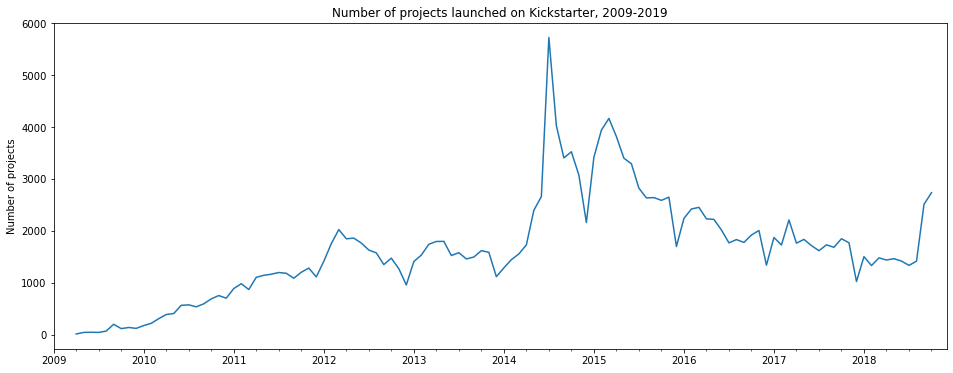

In [88]:
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('M').count().plot() #resampling time series to Months
plt.xlim('2009-01-01', '2018-12-31')
plt.xlabel('')
plt.ylabel('Number of projects')
plt.title('Number of projects launched on Kickstarter, 2009-2019')
plt.show()

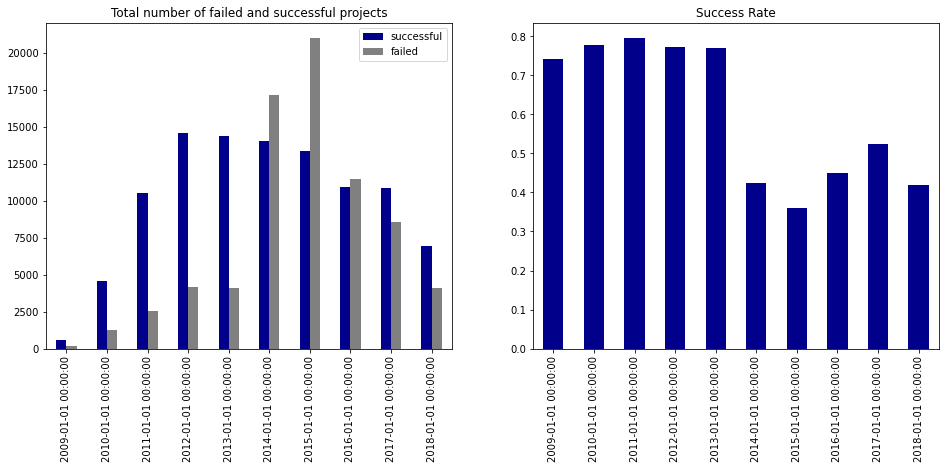

In [86]:
#year_df['launched_at'] = pd.to_datetime(year_df['launched_at'],format='%Y')
year_df = df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()
year_df1 = year_df[['successful', 'failed']]

fig, ax = plt.subplots(1,2, figsize=(16,6))
year_df1.plot.bar(ax=ax[0], color=['darkblue', 'grey'])
ax[0].set_title('Total number of failed and successful projects')
ax[0].set_xlabel('')

year_df1["successful"].div(year_df.sum(axis=1), axis=0).plot(kind='bar', ax=ax[1], color='darkblue') # Normalizes counts across rows
ax[1].set_title('Success Rate')
ax[1].set_xlabel('')
plt.show()

The left image depicts the total number of failed and successful projects, which indicated that the total number of failures and successes have been decreading since 2013. Not equally as the right images showcases: the success rate has depreciated over the past years.

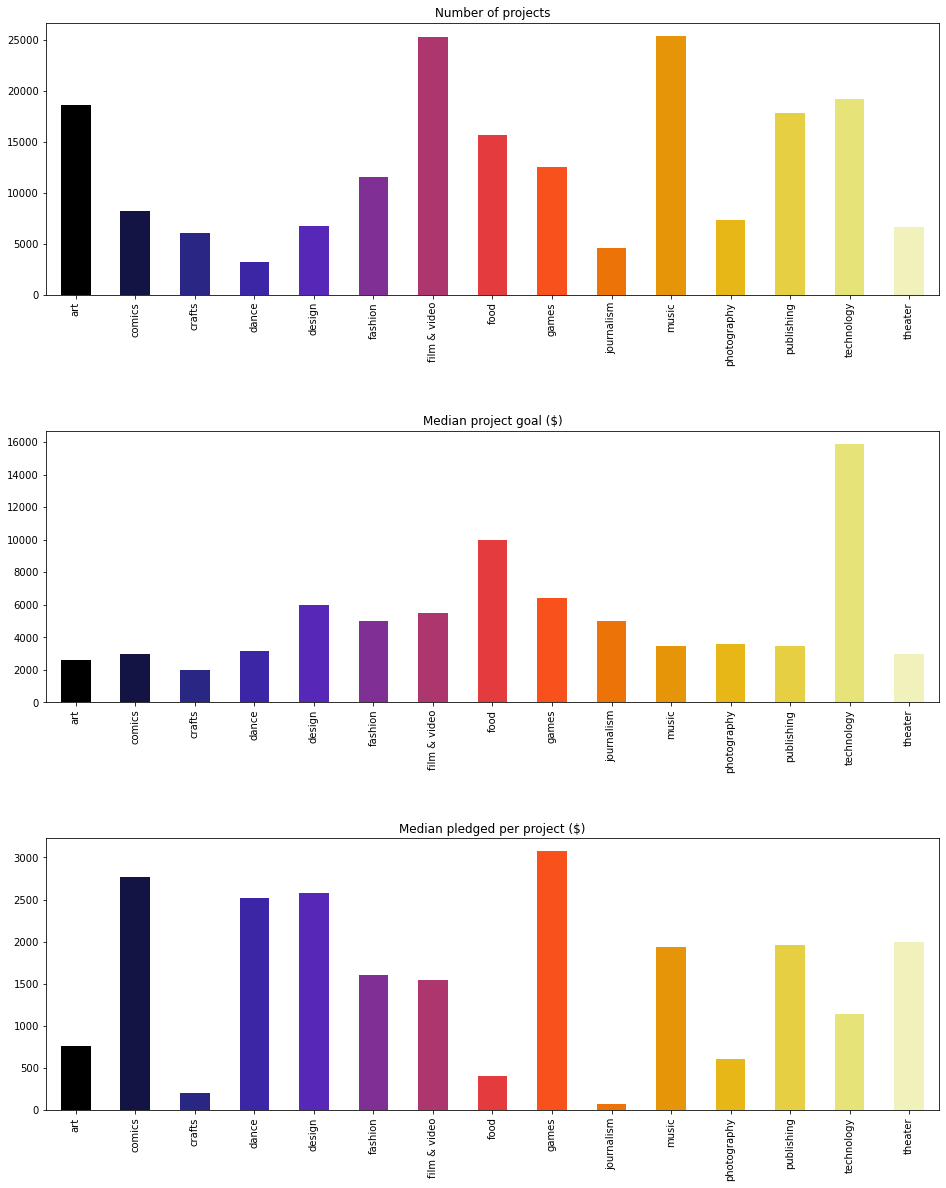

In [89]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(16,20))
color = cm.CMRmap(np.linspace(0, 1, 16,df.category.nunique()))

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.5)
plt.show()

The illustrations above aim to highlight the differences among the 15 different categories. Film&Video is the most used category, closely followed by music. Art, publishing and technology take the third place. However, technology has the highest median project goal. Design is the category with the highed pledged amount per project.

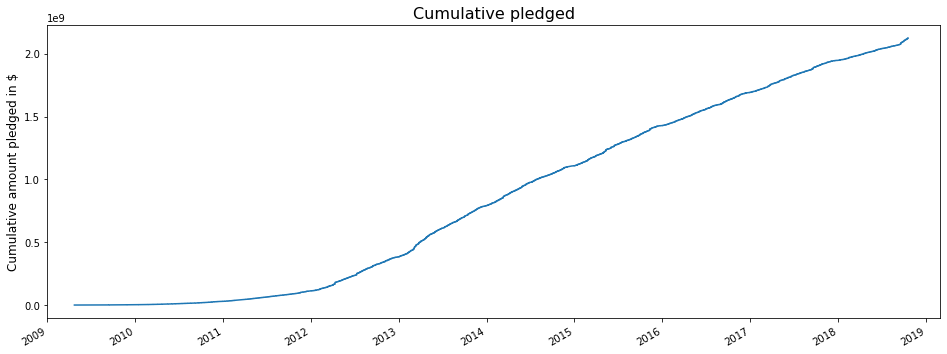

In [90]:
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('')
plt.ylabel('Cumulative amount pledged in $', fontsize=12)
plt.title('Cumulative pledged', fontsize=16)
plt.show()

The cumulative pledged figure shows the total of pledged amounts for each year 2009-2019. The trend can be split into two phases, with a change in 2013/2014.

/Users/eugeniasaggioro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eugeniasaggioro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


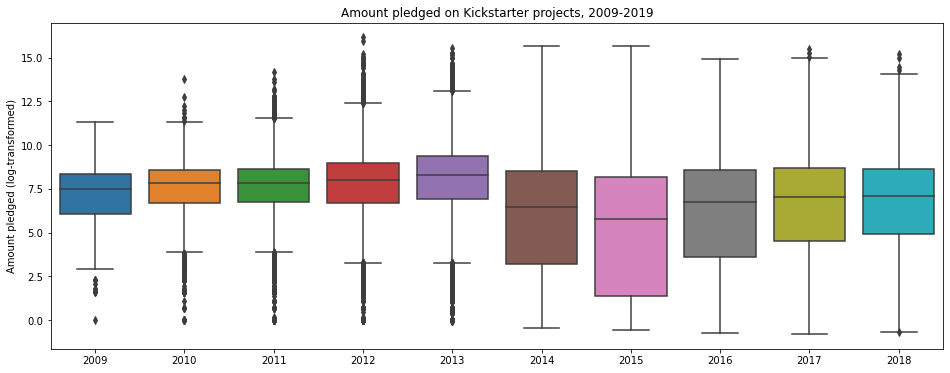

In [91]:
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('')
plt.ylabel('Amount pledged (log-transformed)',) #Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019')
plt.show()

Again, the trend can be split into two phases, with a change in 2014. We can see a greater variation in amounts pledged from 2014, with lower median amounts than before 2014, but generally higher mean amounts due to some very large projects.

# Modeling
## Overview

1. LOGISTIC REGRESSION: Logistic regression as a binary classifier in order to predict which of two categories a data point falls in to. Probability it will successful or not.
2. MULTI LINEAR REGRESSION: What can be the funding goal for this project based on the range of prices for this category/subtopic? Help creators to set a feasible goal.
2. LOGISTIC REGRESSION multiclass classification: Level based on pledged amount. Which variables are more correlated with price? A, B, C, D, E based on pledged amount - funding goal.
3. LOGISTIC REGRESSION WITH PCA: As the dataset has a lot of features, we can usa PCA and reduce it to fewer features which still explain the variation --> model fitting / accuracy can be improved herewith confusion matrix and classification for using the best parameters
4. RANDOM FOREST: The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It works by building multiple different decision trees to predict which category a data point belongs to.

### 1. Logistic Regression
For our dummy model we train a classification model with several numeric and categorical features of completed projects to get an estimation whether the model would generally be able to predict the success of a project.

Numeric features: 
- Nr of Backers
- Goal

Categorical features:
- Category
- Subcategory
- Country 
- Nation
- spotlight
- staff_pick

Target variable: 
- state

In [183]:
#Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [69]:
#Transform dataset
df_dummy=df

df_dummy=df_dummy.loc[df['state'].isin(["failed","successful"])]
df_dummy=df_dummy.loc[df['project_status'].isin(["inactive"])]

#Drop unused columns
del_col=['project_id', 'name', 'slug', 'blurb', 'url', 'subcategory_id', 'creator_id', 'creator_name',
        'city', 'created_at', 'launched_at', 'deadline','pledged', 'currency', 'usd_pledged', 'current_currency',
        'fx_rate', 'static_usd_rate', 'currency_trailing_code', 'usd_type', 'project_status','state_changed_at',
        'disable_communication', 'is_creator_registered','is_starrable']

df_dummy=df_dummy.drop(del_col, axis = 1)

#Transform y to 0:1 
y=df_dummy["state"].replace({'failed' : 0, 'successful': 1})

X=df_dummy
X=X.drop('state', axis = 1)

#### Trial #1

In [70]:
#Build preprocessor for columns
#Standardize numerical features
numeric_features=["nr_backers", "goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", "spotlight", "staff_pick"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Making predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Evaluation #1

In [71]:
# Logistic regression scores
print("Logistic regression score for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred))

Logistic regression score for training set: 1.0
Logistic regression score for test set: 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15160
           1       1.00      1.00      1.00     17826

    accuracy                           1.00     32986
   macro avg       1.00      1.00      1.00     32986
weighted avg       1.00      1.00      1.00     32986



The performance metrics are  extremely high and decribe a perfect model. This is mainly because  the feature "spotlight" is perfectly correlated to the target variable. In the following trial we will evaluate the model without this feature. Nonetheless, "spotlight" is an important variable that needs further analysis. 

#### Trial #2

In [156]:
#Build preprocessor for columns
#Standardize numerical features
numeric_features=["nr_backers", "goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "nation", "staff_pick"]
categorical_transformer = OneHotEncoder(sparse = False, handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Making predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Evaluation #2

In [160]:
# Logistic regression scores
print("Logistic regression score for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred))

Logistic regression score for training set: 0.89872
Logistic regression score for test set: 0.89444

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15160
           1       0.94      0.86      0.90     17826

    accuracy                           0.89     32986
   macro avg       0.89      0.90      0.89     32986
weighted avg       0.90      0.89      0.89     32986



## Feature Engineering

**Feature Selection with Variance Threshold**

In this part we're optimizing our model through feature selection with a variance threshold. Thus, we're testing the model for 
multiple thresholds to decide which threshold provides us with the highest weighted F1 score. Since our data set is balanced and we're aiming for a good overall classification of samples we're relying on the weighted F1-score to correctly represent the proportion of each class’s support relative to the sum of all support values. 

In [158]:
def opt_variance_threshold(X, preprocessor, varthresh):
    X_trans = preprocessor.fit_transform(X)

    #Variance Threshold
    sel = VarianceThreshold(threshold = (varthresh*(1-varthresh)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)

    #Build Logistic Regression
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Making predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Logistic regression scores
    scores={"Variance Threshold": varthresh, "Train Score":round(clf.score(X_train, y_train),8), 
            "Test Score":round(clf.score(X_test, y_test),8), 
            "F1-Score Train":round(f1_score(y_train, y_train_pred, average='weighted'),8),
            "F1 Score Test":round(f1_score(y_test, y_test_pred, average='weighted'),8)}
    scores=pd.DataFrame(data=scores, index=[varthresh])
    return scores

scoring= pd.DataFrame(columns = ["Variance Threshold", "Train Score", "Test Score"])

#Iterate thresholds
for j in np.arange(0.8,1,0.01):
    xx=opt_variance_threshold(X, preprocessor, j)
    scoring=pd.concat([scoring,xx], axis=0)

#Select optimal threshold
opt_thresh=scoring['F1 Score Test'].idxmax().round(2)
print("Optimal threshold for max f1-score test set: "+str(opt_thresh))

Optimal threshhold for max f1-score test set: 0.96


#### Hyperparameter Tuning Logistic Regression using GridSearch
In this part we're tuning the hyperparameter using cross-validated GridSearch with our optimized Variance Threshold#Te. We're optimizing the C-Value as the main hyperparameter of the regression, the penalty of the loss function, as well as the solver itself. The results will be tested against the F1 score, as in the previous feature selection. 

In [181]:
def grid_search(X, preprocessor, vt_opt):
    X_trans = preprocessor.fit_transform(X)

    #Variance Threshold
    sel = VarianceThreshold(threshold = (vt_opt*(1-vt_opt)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)

    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver": ['newton-cg', 'lbfgs', 'liblinear']}
    
    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=3, scoring ="f1")
    logreg_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    
    return logreg_cv.best_params_

check=grid_search(X, preprocessor, opt_thresh)

opt_hyper=int(check["C"])
opt_regularization=str(check["penalty"])
opt_solver=str(check["solver"])

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [182]:
#Testing:
def test_model(X, preprocessor, vt_opt, opt_hyper, opt_regularization, opt_solver):
    X_trans = preprocessor.fit_transform(X)

    #Optimal Variance Threshold
    sel = VarianceThreshold(threshold = (vt_opt*(1-vt_opt)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)
    
    #LogReg with optimal parameters
    clf=LogisticRegressionCV(cv=5, Cs=opt_hyper, solver=opt_solver, penalty=opt_regularization)
    clf.fit(X_train,y_train)
    
    # Making predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    #Scoring
    print("F1-Score Train"+ str(round(f1_score(y_train, y_train_pred, average='weighted'),8)))
    print("F1 Score Test"+str(round(f1_score(y_test, y_test_pred, average='weighted'),8)))
    
    return #F1 Score
    
opt_hyper=int(check["C"])
test_model(X,preprocessor, opt_thresh, opt_hyper, opt_regularization, opt_solver)

F1-Score Train0.91466579
F1 Score Test0.91226466


## Interpretation:
xxx

xxx

**To Do's**
- Feature selection: Welche features sollten ins Modell mitaufgenommen werden und welche nicht? --> **FEATURE ENGINEERING AND FEATURE SELECTION**

**Feature Engineering**
Cat features:
--> Ordinal Encoder vs One-Hot Encoder?
--> Sparse representation when many unique categorical features

Numeric features:
- Counting 
- Rounding
- Binning / Discretization (Könnte gut sein)
- Statistical transformations: LogTransformation; Box-Cox Transformation (Könnte gut sein)
- Scaling: Bring all values to a scale from 0 to 1 
- Normalization: All samples have a unit form

Feature cross: 
A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features

Engineering: 
created_at: when the project has been created - yyyy/mm/dd.
launched_at: launch date of the project - yyyy/mm/dd.
deadline: deadline of the project - yyyy/mm/dd.

- Campaign length — number of days from launch to deadline: DEADLINE - LAUNCH DATE
- Number of days from page creation to project launch: LAUNCH DATE - CREATION DATE
- Name: Word length
- Blurb: Word length

Opt: 
- Month of launch
- Month of deadline
- Day of launch
- Day of deadline
- Two hour window of launch
- Two hour window of deadline

**Feature Selection**
Avoid rarely used discrete feature values
1. Variance Threshold -> Opt Threshold bei 0.96
2. Recursive Feature Elimination
3. SelectFromModel

Coefficients abgleichen für jedes Feature

Features:
Numeric:
    Goal: Sinnvoll
    Number of backers: Sinvoll
    
Cat:
    Category:
    Subcategory:
    Country: 
    Nation: Macht keinen sinn
    Staff pick: Sinnvoll 

- Confusion Matrix
- ROC und AUC curves für bessere Beurteilung (LogLoss??)
- Kann F1 Score als zentrale Metrik genommen werden? (Es ist nicht eindeutig ob True False oder False True schlimmer ist)
- 205k Samples insgesamt --> SGD classifier for large datasets >100K samples

In [103]:
X.head()

,category,subcategory,country,nation,nr_backers,goal,spotlight,staff_pick
1,art,Public Art,US,GA,3,777.0,False,False
2,journalism,Print,US,MI,31,1000.0,True,False
3,food,Drinks,US,PA,4,1000.0,False,False
4,film & video,Documentary,US,CA,800,25000.0,True,False
5,technology,Apps,US,CO,0,50000.0,False,False


### 4. Logistic Regression with PCA
The dependent (y) and independent (X) features will be separated into separate datasets. Because the features are on different scales, independent features will be transformed and normalised using StandardScaler.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Fitting a logistic regression model with default parameters
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

# Making predictions
y_hat_train = logistic_regression.predict(X_train)
y_hat_test = logistic_regression.predict(X_test)
# Logistic regression scores
print("Log Reg score, training set:", round(logistic_regression.score(X_train, y_train),5))
print("Log Reg score, test set:", round(logistic_regression.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

In [ ]:
df_transformed = df.drop(['nr_backers', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'subcategory'], axis=1)
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [ ]:
#df_transformed = pd.get_dummies(df_transformed)

In [ ]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [ ]:
X_unscaled

In [ ]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

In [ ]:
# Fitting
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

### 5. Random Forest

In [96]:
>>> conda install transformers

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: done

## Package Plan ##

  environment location: /Users/eugeniasaggioro/opt/anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boto3-1.21.32              |     pyhd3eb1b0_0          71 KB
    botocore-1.24.32           |     pyhd3eb1b0_0         4.3 MB
    ca-certificates-2022.4.26  |       hecd8cb5_0         124 KB
    jmespath-0.10.0            |     pyhd3eb1b0_0          22 KB
    s3transfer-0.5.0           |     pyhd3eb1b0_0          57 KB
    sacremoses-0.0.43          |     pyhd3eb1b0_0         284 KB
    transformers-2.1.1         |     pyhd3eb1b0_0         136 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The 

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

In [123]:
#Transform dataset
df_dummy=df

df_dummy=df_dummy.loc[df['state'].isin(["failed","successful"])]
df_dummy=df_dummy.loc[df['project_status'].isin(["inactive"])]

#Drop unused columns
del_col=['project_id', 'name', 'slug', 'blurb', 'url', 'subcategory_id', 'creator_id', 'creator_name',
        'city', 'created_at', 'launched_at', 'deadline', 'currency', 'usd_pledged', 'current_currency',
        'fx_rate', 'project_status','state_changed_at','disable_communication', 
         'is_creator_registered','is_starrable']

df_dummy=df_dummy.drop(del_col, axis = 1)

#Transform y to 0:1 
y=df_dummy["state"].replace({'failed' : 0, 'successful': 1})

X=df_dummy
X=X.drop('state', axis = 1)

# Transforming the data
numeric_features=['nr_backers', 'usd_goal']
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", 'launch_day','launch_month']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

In [124]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Greens)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

RandomForestClassifier 0.9396230119772236
RandomForestClassifier               precision    recall  f1-score   support

           0       0.94      0.94      0.94     14895
           1       0.94      0.94      0.94     15663

    accuracy                           0.94     30558
   macro avg       0.94      0.94      0.94     30558
weighted avg       0.94      0.94      0.94     30558



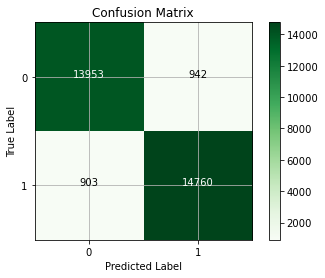

In [126]:
from sklearn.metrics import accuracy_score, auc, classification_report
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))
#print(rnd_clf.__class__.__name__, auc(y_test, y_pred))
print(rnd_clf.__class__.__name__, classification_report(y_test, y_pred))

plot_cf(y_test, y_pred)

In [132]:
feature_imp = pd.Series(rnd_clf.feature_importances_,index=X_train.cat_features).sort_values(ascending=False)
feature_imp

AttributeError: cat_features not found